In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets

Target Variable: Amorphous Silica: Uses the solubility of amorphous silica in hot spring waters, effective for low-temperature systems (up to 180°C).


In [ ]:
# Data Processing
data = pd.read_csv("Geothermal.csv")
data = data.drop(columns=['Lab Number', 'Date', 'Sample Label', 'UTM east', 'UTM north', 'Elevation'])
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample Name  259 non-null    object 
 1   Temp C       55 non-null     float64
 2   pH           212 non-null    float64
 3   Li           164 non-null    float64
 4   Na           244 non-null    float64
 5   K            244 non-null    float64
 6   Ca           244 non-null    float64
 7   Mg           217 non-null    float64
 8   SiO2         243 non-null    float64
 9   B            165 non-null    float64
 10  Cl           247 non-null    float64
 11  F            165 non-null    float64
 12  SO4          213 non-null    float64
 13  HCO3         219 non-null    float64
 14  CO3          1 non-null      float64
 15  NH4          156 non-null    float64
 16  As           158 non-null    float64
 17  Rb           0 non-null      float64
 18  Cs           0 non-null      float64
 19  Sr      

,Sample Name,Temp C,pH,Li,Na,K,Ca,Mg,SiO2,B,...,HCO3,CO3,NH4,As,Rb,Cs,Sr,Ba,Fe,Mn
0,Meager Creek (S60),59.0,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Meager Creek (N.S-B.G 1974),59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,...,468.0,NaN,NaN,-0.2,NaN,NaN,-0.05,0.1,NaN,0.2
2,Meager Creek (N.S-B.G 1974),NaN,NaN,NaN,430.0,27.0,85.0,NaN,NaN,NaN,...,513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Meager Creek (N.S-B.G 1974),NaN,NaN,NaN,440.0,27.0,85.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Meager Creek (N.S-B.G 1974),NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = pd.read_csv('Target Variable.csv')
y.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sample Name       257 non-null    object
 1   Amorphous Silica  258 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


,Sample Name,Amorphous Silica
0,Meager Creek (S60),0
1,Meager Creek (N.S-B.G 1974),44
2,Meager Creek (N.S-B.G 1974),0
3,Meager Creek (N.S-B.G 1974),0
4,Meager Creek (N.S-B.G 1974),39


In [ ]:
merged = pd.merge(data, y, on='Sample Name')
merged = merged.fillna(0)  # Replace NaN values with 0
print(len(merged))
merged.head()


338


,Sample Name,Temp C,pH,Li,Na,K,Ca,Mg,SiO2,B,...,CO3,NH4,As,Rb,Cs,Sr,Ba,Fe,Mn,Amorphous Silica
0,Meager Creek (S60),59.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
1,Meager Creek (N.S-B.G 1974),59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,...,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2,44
2,Meager Creek (N.S-B.G 1974),59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,...,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2,0
3,Meager Creek (N.S-B.G 1974),59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,...,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2,0
4,Meager Creek (N.S-B.G 1974),59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,...,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2,39


In [ ]:
max(merged['Temp C'])

68.5

In [ ]:
input = merged.drop(columns=['Sample Name', 'Amorphous Silica'])
print(len(input))
input.head()

338


,Temp C,pH,Li,Na,K,Ca,Mg,SiO2,B,Cl,...,HCO3,CO3,NH4,As,Rb,Cs,Sr,Ba,Fe,Mn
0,59.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,675.0,...,468.0,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2
2,59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,675.0,...,468.0,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2
3,59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,675.0,...,468.0,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2
4,59.0,7.2,1.2,450.0,47.0,81.0,25.0,164.0,2.0,675.0,...,468.0,0.0,0.0,-0.2,0.0,0.0,-0.05,0.1,0.0,0.2


In [ ]:
# Normalize input data
input_norm = (input - input.mean())/input.std()
input_norm = input_norm.fillna(0)
input_norm.head()

,Temp C,pH,Li,Na,K,Ca,Mg,SiO2,B,Cl,...,HCO3,CO3,NH4,As,Rb,Cs,Sr,Ba,Fe,Mn
0,1.951893,0.013865,-0.834046,-1.345411,-1.504850,-0.777927,-0.357324,-1.556800,-0.903624,-1.218866,...,-0.723572,0.054393,0.394782,-0.786370,0.0,0.0,-0.048660,-0.111897,-0.156276,-0.418082
1,1.951893,0.327554,-0.225448,-0.615845,-0.475574,0.165802,0.309919,-0.400678,-0.631809,-0.536437,...,0.749144,0.054393,0.394782,-1.256967,0.0,0.0,-0.431148,9.112813,-0.156276,0.382619
2,1.951893,0.327554,-0.225448,-0.615845,-0.475574,0.165802,0.309919,-0.400678,-0.631809,-0.536437,...,0.749144,0.054393,0.394782,-1.256967,0.0,0.0,-0.431148,9.112813,-0.156276,0.382619
3,1.951893,0.327554,-0.225448,-0.615845,-0.475574,0.165802,0.309919,-0.400678,-0.631809,-0.536437,...,0.749144,0.054393,0.394782,-1.256967,0.0,0.0,-0.431148,9.112813,-0.156276,0.382619
4,1.951893,0.327554,-0.225448,-0.615845,-0.475574,0.165802,0.309919,-0.400678,-0.631809,-0.536437,...,0.749144,0.054393,0.394782,-1.256967,0.0,0.0,-0.431148,9.112813,-0.156276,0.382619


In [ ]:
input_norm.tail()

,Temp C,pH,Li,Na,K,Ca,Mg,SiO2,B,Cl,...,HCO3,CO3,NH4,As,Rb,Cs,Sr,Ba,Fe,Mn
333,-0.639784,0.892193,0.332433,0.227209,-0.059484,-0.440049,-0.306614,0.417067,0.360316,0.065111,...,-0.440358,0.054393,-1.220670,0.154824,0.0,0.0,-0.04866,-0.111897,-0.156276,-0.418082
334,-0.639784,-1.931002,-0.834046,0.227209,0.006215,-0.591511,-0.357324,0.699048,-0.903624,0.034781,...,-0.723572,0.054393,0.394782,-0.786370,0.0,0.0,-0.04866,-0.111897,-0.156276,-0.418082
335,-0.639784,0.860824,0.332433,0.227209,0.050014,-0.626464,-0.335973,0.558057,0.441860,0.075221,...,-0.345953,0.054393,-1.220670,-0.009885,0.0,0.0,-0.04866,-0.111897,-0.156276,-0.418082
336,-0.639784,0.892193,0.383149,0.292059,0.050014,-0.370143,-0.322628,0.135086,0.414679,0.166212,...,-0.500147,0.054393,-1.220670,0.225413,0.0,0.0,-0.04866,-0.111897,-0.156276,-0.418082
337,-0.639784,-1.931002,-0.834046,0.437973,0.159511,-0.579860,-0.357324,0.487562,-0.903624,0.236982,...,-0.723572,0.054393,0.394782,-0.786370,0.0,0.0,-0.04866,-0.111897,-0.156276,-0.418082


In [ ]:
input.tail()

,Temp C,pH,Li,Na,K,Ca,Mg,SiO2,B,Cl,...,HCO3,CO3,NH4,As,Rb,Cs,Sr,Ba,Fe,Mn
333,0.0,9.0,2.3,970.0,66.0,29.0,1.9,280.0,9.3,1270.0,...,90.0,0.0,-0.5,0.40,0.0,0.0,0.0,0.0,0.0,0.0
334,0.0,0.0,0.0,970.0,69.0,16.0,0.0,320.0,0.0,1240.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
335,0.0,8.9,2.3,970.0,71.0,13.0,0.8,300.0,9.9,1280.0,...,120.0,0.0,-0.5,0.33,0.0,0.0,0.0,0.0,0.0,0.0
336,0.0,9.0,2.4,1010.0,71.0,35.0,1.3,240.0,9.7,1370.0,...,71.0,0.0,-0.5,0.43,0.0,0.0,0.0,0.0,0.0,0.0
337,0.0,0.0,0.0,1100.0,76.0,17.0,0.0,290.0,0.0,1440.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(input.columns)

22

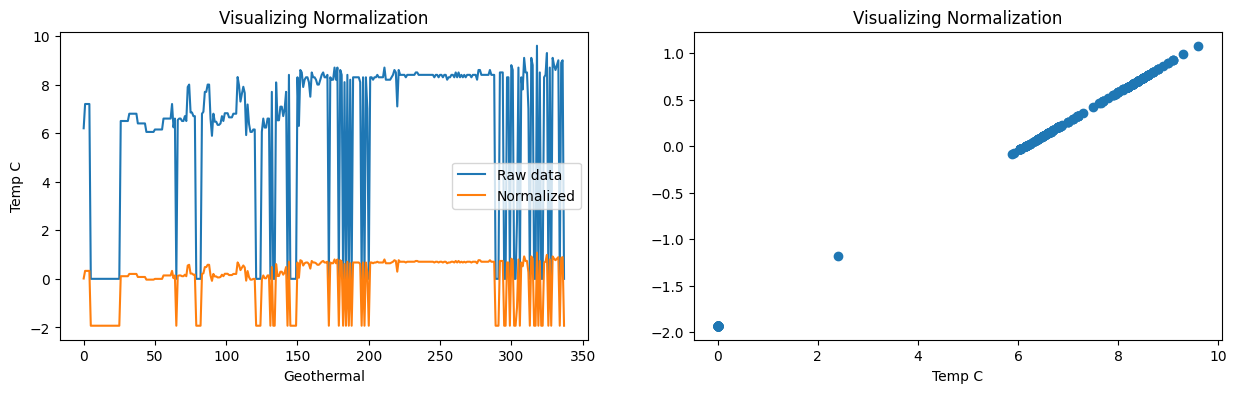

In [ ]:
#visualize normalization

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(input['pH'])
plt.plot(input_norm['pH'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('Temp C')
plt.xlabel('Geothermal')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(input['pH'], input_norm['pH'])
plt.xlabel('Temp C')
plt.title('Visualizing Normalization')

plt.show()

PCA

In [ ]:
pca = PCA()
PCs = pca.fit_transform(input_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

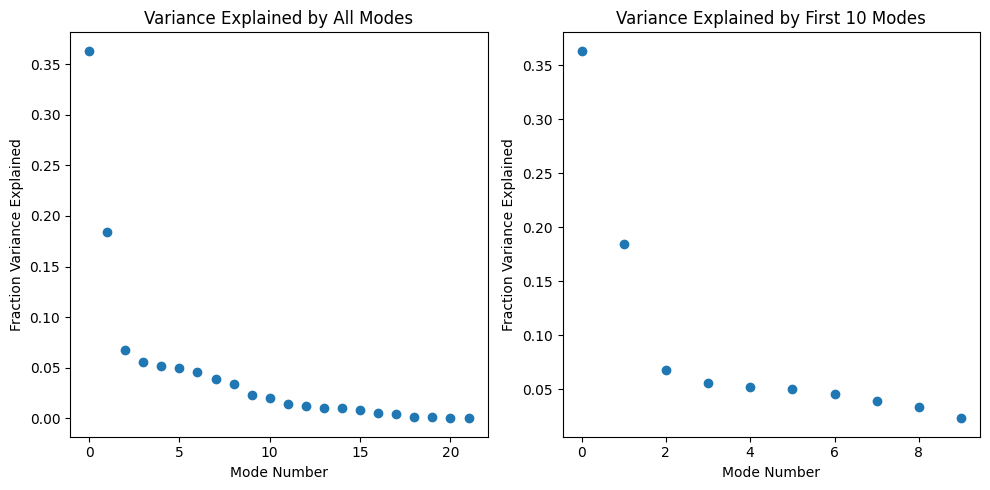

In [ ]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

In [ ]:
print(f'Fraction Variance Explained by Mode 1: {round(fracVar[0], 2)}')
print(f'Fraction Variance Explained by Mode 2: {round(fracVar[1], 2)}')
print(f'Fraction Variance Explained by Mode 3: {round(fracVar[2], 2)}')

Fraction Variance Explained by Mode 1: 0.36
Fraction Variance Explained by Mode 2: 0.18
Fraction Variance Explained by Mode 3: 0.07


In [ ]:
fracVar[0]+fracVar[1]+fracVar[2]

0.6156800013469493

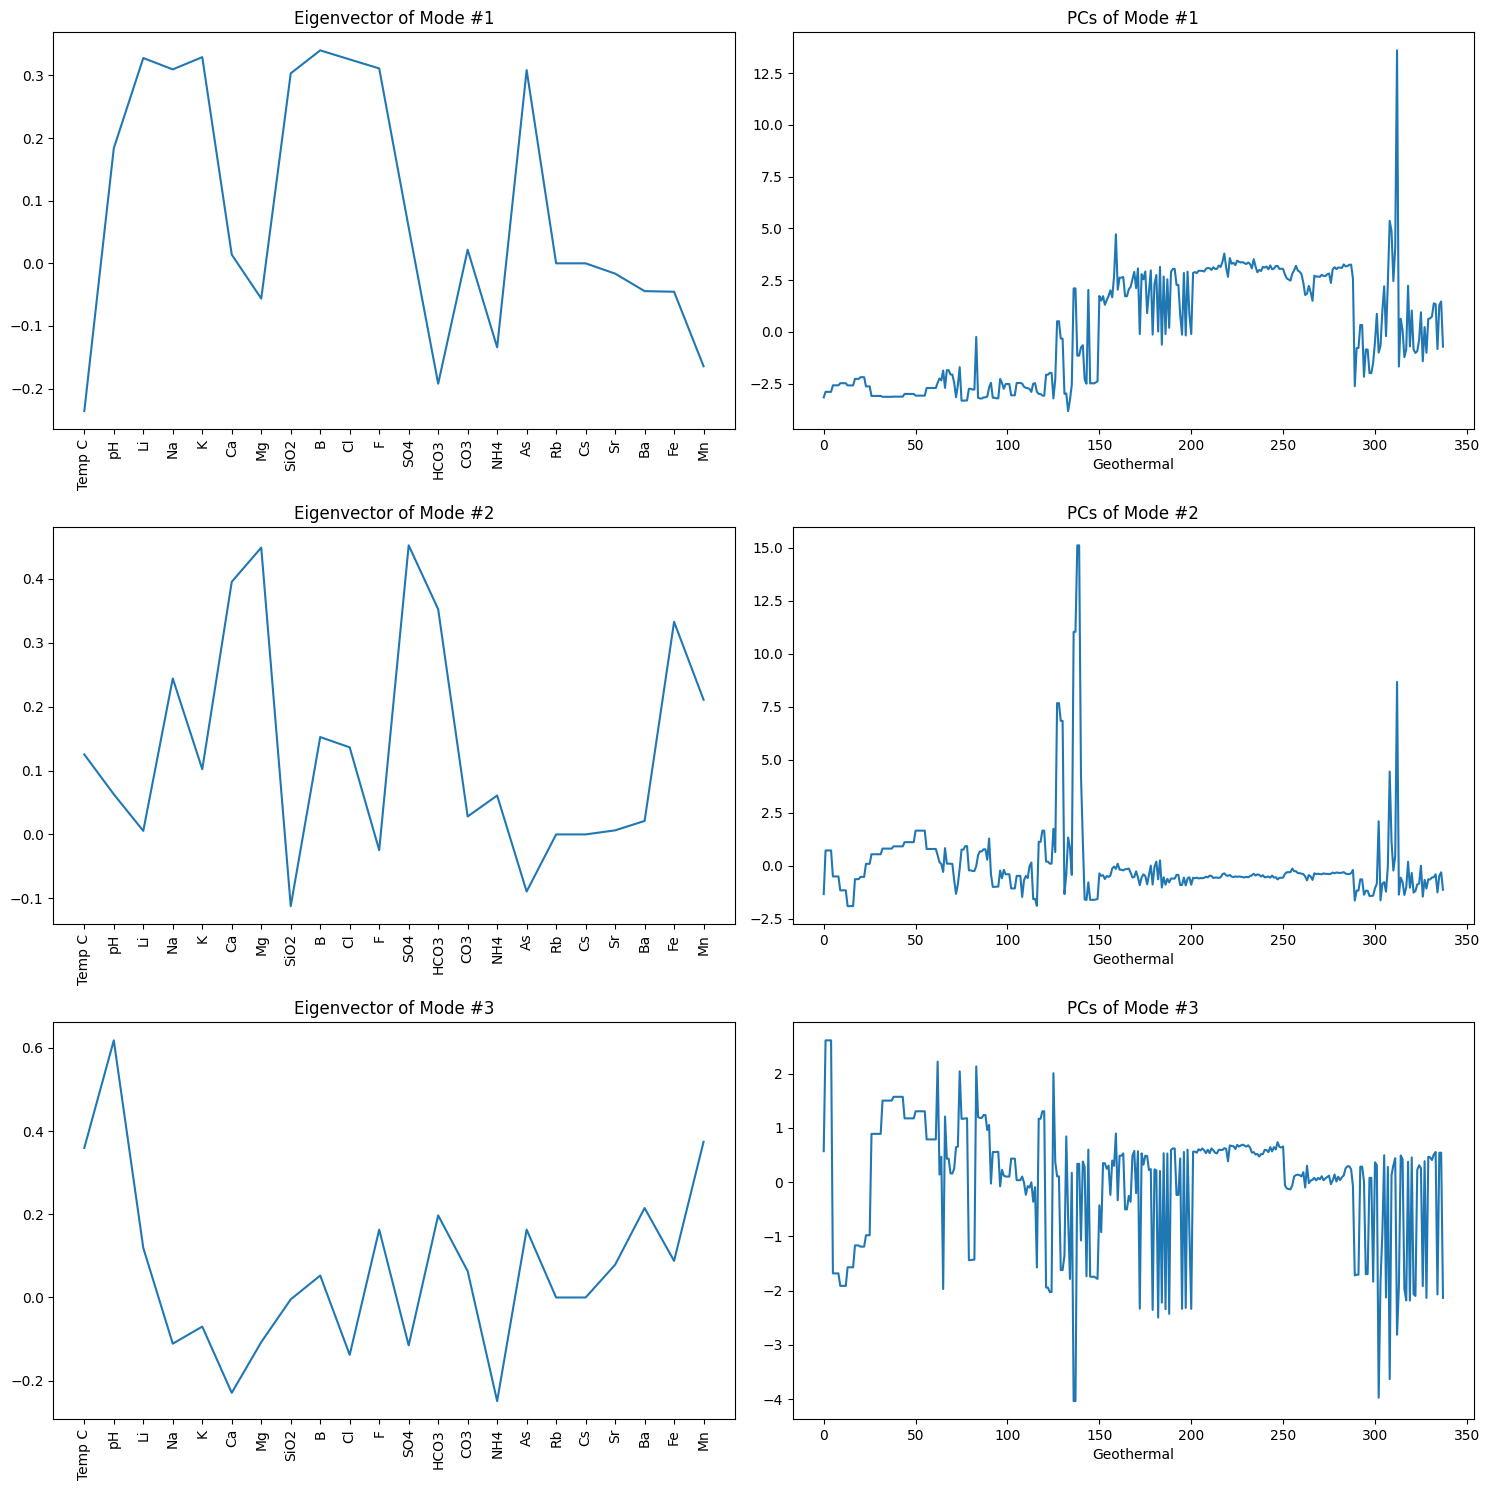

In [ ]:
n = 3

plt.figure(figsize=(15,5*n))
for kk in range(n):

    plt.subplot(n,2,kk*2+1)
    plt.plot(list(input_norm.columns),eigvecs[kk,:])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))

    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Geothermal')

    plt.tight_layout()

Reconstructed Data from PCA

In [ ]:
n_modes = 3
pca = PCA(n_components=n_modes)
PCs = pca.fit_transform(input_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

In [ ]:
data_rec = PCs[:,:n_modes]@eigvecs[:n_modes,:]

#find minimum RMSE between reconstruction and original

RMSE = np.sqrt(np.sum((input_norm - data_rec)**2,axis=1))

ind_minRMSE = np.argmin(RMSE)

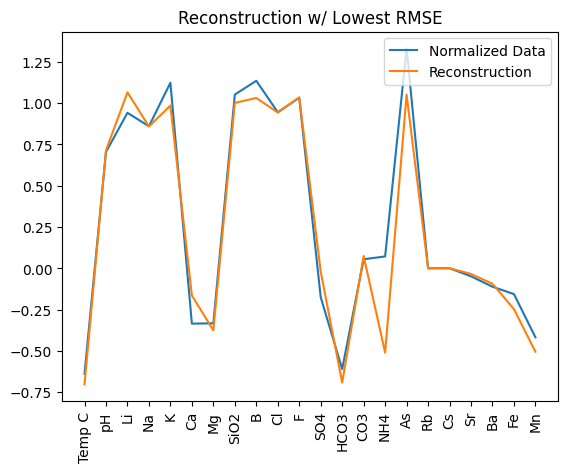

In [ ]:
plt.plot(input_norm.iloc[ind_minRMSE,:])
plt.plot(data_rec[ind_minRMSE,:])
plt.legend(['Normalized Data','Reconstruction'])
plt.title('Reconstruction w/ Lowest RMSE')
plt.xticks(rotation=90)
plt.show()

MLP

In [ ]:
import sklearn
from sklearn.neural_network import MLPRegressor

In [ ]:
def rmse(target,prediction):   # root mean square error
    return(np.sqrt(((target - prediction)**2).sum()/len(target)))

In [ ]:
# Load data
X = PCs[:, :3]  # Use first 3 principal components
y = pd.to_numeric(merged['Amorphous Silica'], errors='coerce').fillna(0)

# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Shuffle the indices
indices = np.arange(len(X))
np.random.shuffle(indices)

# Use the shuffled indices to split the data
Ntrain = int(len(X) * 0.8)
train_indices = indices[:Ntrain]
test_indices = indices[Ntrain:]

x_train, x_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Standardize y only, x is already standardized
y_mean, y_std = np.mean(y_train), np.std(y_train)
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std


In [ ]:
print(X.shape)
print(y.shape)

(338, 3)
(338,)


In [ ]:
num_models = 10  # Number of models to build for the ensemble
min_nhn = 1  # Minimum number of hidden neurons to loop through (nhn = 'number hidden neurons')
max_nhn = 12  # Maximum number of hidden neurons to loop through
max_hidden_layers = 2  # Maximum number of hidden layers to loop through (nhl = 'number hidden layers')
batch_size = 32
solver = 'sgd'  # Use stochastic gradient descent as an optimization method
activation = 'relu'
learning_rate_init = 0.001
max_iter = 1500  # Max number of epochs to run for any model
early_stopping = True  # Stop early if validation error begins to rise
validation_fraction = 0.2  # Fraction of training data to use as validation

y_out_all_nhn = []
y_out_ensemble = []
RMSE_ensemble = []  # RMSE for each model in the ensemble
nhn_best = []
nhl_best = []

print("Building Ensemble Models...\n")
for model_num in range(num_models):  # For each model in the ensemble
    print(f"Model Number: {model_num}")

    RMSE = []
    y_out_all_nhn = []
    nhn = []
    nhl = []

    for num_hidden_layers in range(1, max_hidden_layers + 1):
        print(f"\t# Hidden Layers: {num_hidden_layers}")

        for num_hidden_neurons in range(min_nhn, max_nhn + 1):  # For each number of hidden neurons
            print(f"\t\t# Hidden Neurons: {num_hidden_neurons}")

            hidden_layer_sizes = tuple([num_hidden_neurons] * num_hidden_layers)
            model = MLPRegressor(
                hidden_layer_sizes=hidden_layer_sizes,
                verbose=False,
                max_iter=max_iter,
                early_stopping=early_stopping,
                validation_fraction=validation_fraction,
                batch_size=batch_size,
                solver=solver,
                activation=activation,
                learning_rate_init=learning_rate_init
            )

            model.fit(x_train, y_train)  # Train the model

            y_out_this_nhn = model.predict(x_test)  # Model prediction
            y_out_all_nhn.append(y_out_this_nhn)  # Store all models

            current_rmse = rmse(y_test, y_out_this_nhn)  # Compute RMSE
            RMSE.append(current_rmse)

            nhn.append(num_hidden_neurons)
            nhl.append(num_hidden_layers)

            print(f"\t\t\tRMSE: {current_rmse:.4f}")

    indBest = RMSE.index(np.min(RMSE))  # Index of model with lowest RMSE
    RMSE_ensemble.append(np.min(RMSE))
    nhn_best.append(nhn[indBest])
    nhl_best.append(nhl[indBest])
    y_out_ensemble.append(y_out_all_nhn[indBest])

    print(f"\tBEST: {nhl_best[model_num]} hidden layers, {nhn_best[model_num]} hidden neurons")
    print(f"\t\tRMSE of Best Model: {RMSE_ensemble[model_num]:.4f}\n")

# Ensemble performance
y_out_ensemble_mean = np.mean(y_out_ensemble, axis=0)
RMSE_ensemble_mean = rmse(y_out_ensemble_mean, y_test)

print("\nEnsemble Summary:")
print(f"Average RMSE of Ensemble: {RMSE_ensemble_mean:.4f}")
print(f"Best Model Across Ensemble: {min(RMSE_ensemble):.4f} RMSE")

Building Ensemble Models...

Model Number: 0
	# Hidden Layers: 1
		# Hidden Neurons: 1
			RMSE: 0.5401
		# Hidden Neurons: 2
			RMSE: 0.5895
		# Hidden Neurons: 3
			RMSE: 0.5391
		# Hidden Neurons: 4
			RMSE: 0.5337
		# Hidden Neurons: 5
			RMSE: 0.5229
		# Hidden Neurons: 6
			RMSE: 0.5453
		# Hidden Neurons: 7
			RMSE: 0.5493
		# Hidden Neurons: 8
			RMSE: 0.5934
		# Hidden Neurons: 9
			RMSE: 0.5030
		# Hidden Neurons: 10
			RMSE: 0.4675
		# Hidden Neurons: 11
			RMSE: 0.4799
		# Hidden Neurons: 12
			RMSE: 0.5478
	# Hidden Layers: 2
		# Hidden Neurons: 1
			RMSE: 0.5379
		# Hidden Neurons: 2
			RMSE: 0.9557
		# Hidden Neurons: 3
			RMSE: 0.5370
		# Hidden Neurons: 4
			RMSE: 0.5687
		# Hidden Neurons: 5
			RMSE: 0.5445
		# Hidden Neurons: 6
			RMSE: 0.7705
		# Hidden Neurons: 7
			RMSE: 0.5206
		# Hidden Neurons: 8
			RMSE: 0.5468
		# Hidden Neurons: 9
			RMSE: 0.5250
		# Hidden Neurons: 10
			RMSE: 0.6720
		# Hidden Neurons: 11
			RMSE: 0.5709
		# Hidden Neurons: 12
			RMSE: 0.50

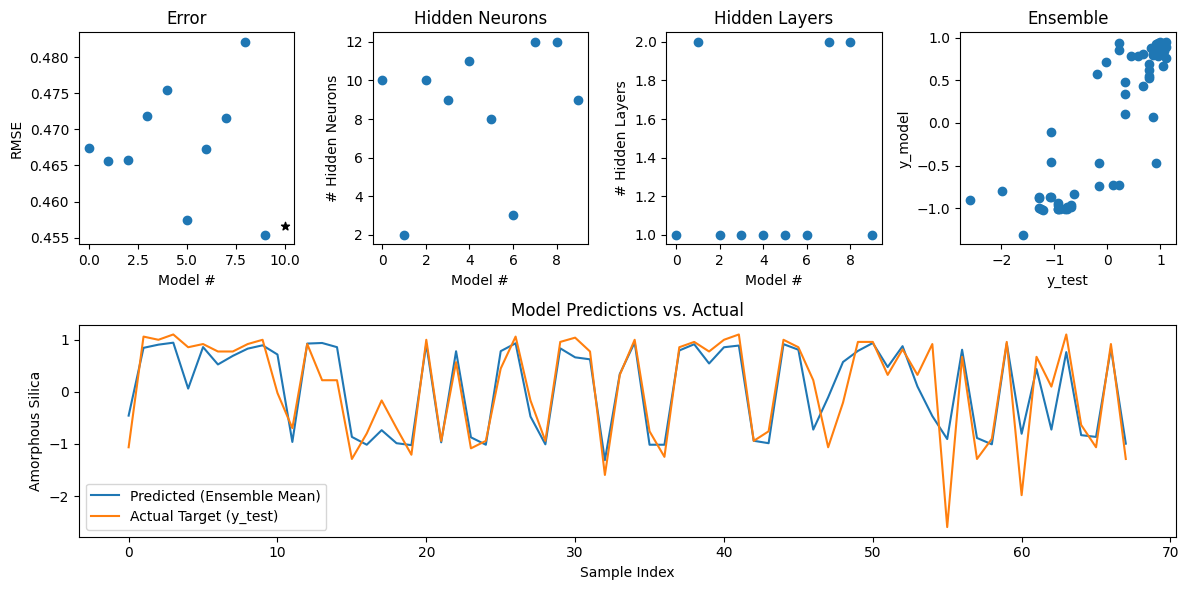

In [ ]:
#visualize

plt.figure(figsize=(12,6))

plt.subplot(241)
plt.scatter(len(RMSE_ensemble),RMSE_ensemble_mean,c='k',marker='*')
plt.scatter(range(len(RMSE_ensemble)),RMSE_ensemble)
plt.xlabel('Model #')
plt.ylabel('RMSE')
plt.title('Error')

plt.subplot(242)
plt.scatter(range(len(nhn_best)),nhn_best)
plt.xlabel('Model #')
plt.ylabel('# Hidden Neurons')
plt.title('Hidden Neurons')

plt.subplot(243)
plt.scatter(range(len(nhl_best)),nhl_best)
plt.xlabel('Model #')
plt.ylabel('# Hidden Layers')
plt.title('Hidden Layers')

plt.subplot(244)
plt.scatter(y_test,y_out_ensemble_mean)
#plt.plot((np.min(y_test),np.max(y_test)),'k--')
plt.xlabel('y_test')
plt.ylabel('y_model')
plt.title('Ensemble')

# reset index to match
y_out_ensemble_mean = pd.Series(y_out_ensemble_mean).reset_index(drop=True)
y_test_original = pd.Series(y_test).reset_index(drop=True)

plt.subplot(212)
plt.plot(y_out_ensemble_mean, label='Predicted (Ensemble Mean)')
plt.plot(y_test_original,label='Actual Target (y_test)', alpha = 1)
plt.legend()
plt.title('Model Predictions vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Amorphous Silica')

plt.tight_layout()

In [ ]:
import seaborn as sns

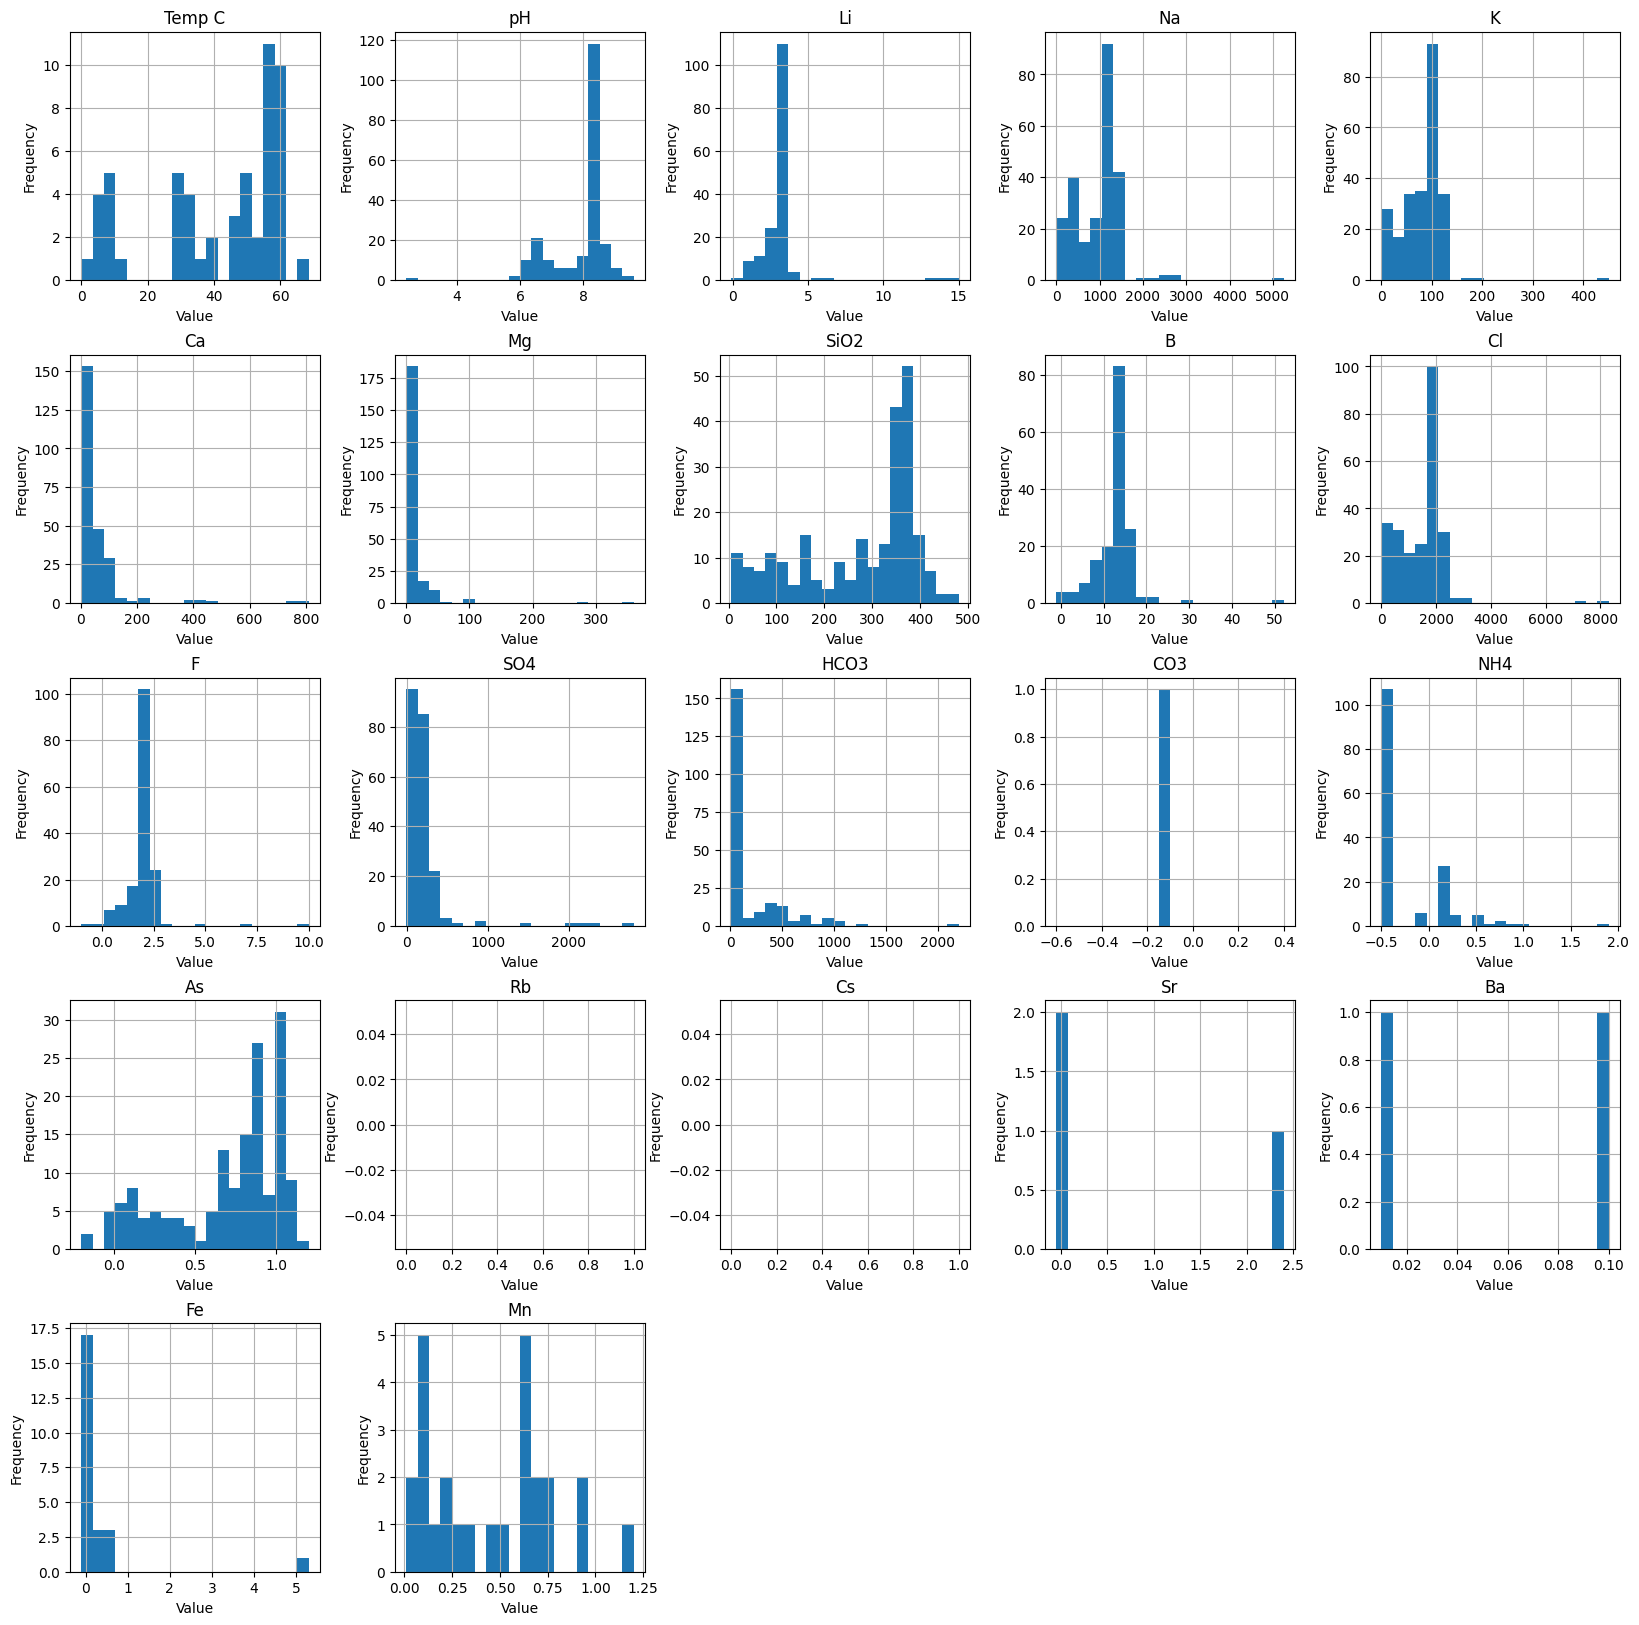

In [ ]:
# Histograms

ax = data.hist(bins=20, figsize=(20, 20))

for axis in ax.flatten():
    axis.set_xlabel('Value')
    axis.set_ylabel('Frequency')

plt.show()

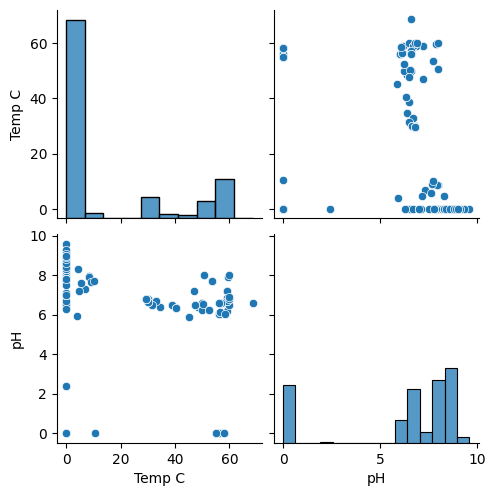

In [ ]:
# pairwise plots showing relation between selected variables
sns.pairplot(merged[['Temp C', 'pH', 'Amorphous Silica']])
plt.show()

In [ ]:
import geopandas as gpd
from pyproj import Proj, transform

In [ ]:
# Geographic distribution of our samples
data_all = pd.read_csv("Geothermal.csv")
data_all = data_all.dropna(subset=['UTM east', 'UTM north'])

proj_utm = Proj(proj='utm', zone=10, ellps='WGS84', preserve_units=False)
proj_latlon = Proj(proj='latlong', ellps='WGS84', datum='WGS84')

data_all = pd.DataFrame({
    'UTM east': [466958.0, 467136.0, 466958.0, 466958.0, 466958.0, 466958.0, 466958.0, 466958.0],
    'UTM north': [5602533.0, 5602816.0, 5602533.0, 5602533.0, 5602533.0, 5602533.0, 5602533.0, 5602533.0]
})

# UTM to Latitude/Longitude
lat_lon = data_all.apply(
    lambda row: transform(proj_utm, proj_latlon, row['UTM east'], row['UTM north']), axis=1
)
data_all['Longitude'], data_all['Latitude'] = zip(*lat_lon)

print(data_all)

world = gpd.read_file("countries.zip")

fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')
plt.scatter(data_all['Longitude'], data_all['Latitude'], c='blue', s=20, label="Sample Locations")
plt.title('Geographic Distribution of Samples (Lat/Lon)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.savefig('world_mapped.jpg')
plt.show()


<ipython-input-93-76dd1cde3d1b>:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lambda row: transform(proj_utm, proj_latlon, row['UTM east'], row['UTM north']), axis=1


   UTM east  UTM north   Longitude   Latitude
0  466958.0  5602533.0 -123.466627  50.573777
1  467136.0  5602816.0 -123.464138  50.576332
2  466958.0  5602533.0 -123.466627  50.573777
3  466958.0  5602533.0 -123.466627  50.573777
4  466958.0  5602533.0 -123.466627  50.573777
5  466958.0  5602533.0 -123.466627  50.573777
6  466958.0  5602533.0 -123.466627  50.573777
7  466958.0  5602533.0 -123.466627  50.573777


DataSourceError: '/vsizip/countries.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [ ]:
canadian_provinces = gpd.read_file("gadm41_CAN_1.json.zip")
bc_map = canadian_provinces[canadian_provinces['NAME_1'] == 'BritishColumbia']

fig, ax = plt.subplots(figsize=(10, 8))

bc_map.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
ax.scatter(data_all['Longitude'], data_all['Latitude'], color='blue', s=20, label='Sample Locations')

plt.title("Sample Locations in British Columbia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.savefig('bc_mapped.jpg')
plt.show()